# Linear SVCs

## SVC Core Ideas

First, lets try and build a picture and try to understand why support vector machines can work well with classification. Consider the following toy example with the iris dataset.

In [3]:
from sklearn import datasets

# SVM visual demo with 2 features on iris dataset (petal length, petal width)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

[0, 5.5, 0, 2]

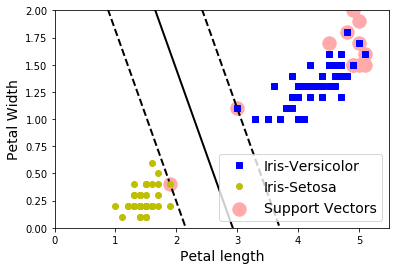

In [47]:
%matplotlib inline
import numpy as np
from math import isclose
import matplotlib.pyplot as plt
from sklearn.svm import SVC


def plot_svc_decision_boundary(fit_svm_clf, xrange):
    w = fit_svm_clf.coef_[0]
    b = fit_svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * xrange - b/w1
    decision_boundary = -w[0]/w[1] * xrange - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if (all(isclose(a, b, abs_tol=1e-2) and 
            isclose(b, c, abs_tol=1e-2) and
            isclose(c, a, abs_tol=1e-2) for a,b,c in zip(gutter_up, gutter_down, decision_boundary))):
        print('Oh no! Decision Boundaries match both gutters!')
        
    svs = fit_svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', label='Support Vectors')
    plt.plot(xrange, decision_boundary, "k-", linewidth=2)
    plt.plot(xrange, gutter_up, "k--", linewidth=2)
    plt.plot(xrange, gutter_down, "k--", linewidth=2)


svm_clf = SVC(kernel="linear", C=1e7)
svm_clf.fit(X, y)

# index by class and plot individually
plot_svc_decision_boundary(svm_clf, np.arange(0, 5.5, .1))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 5.5, 0, 2])

The central strategy of SVM models is to not only generate a decision boundary, but to do so in a way that maximizes the distance between the closest datapoints of both classes. This is called _large margin classification_. We can intuitively understand why this might be an big advantage for the model. While others models may work well, their decision boundaries come so close to that the training instances that newer instances might not perform well.

The reason the model is called a support vector machine is because it is fully supported by vectors or datapoint instances, as circled in the plot. 

## SVM Classification Modes

### Hard Margin Classification

A hard margin classifier strictly considers all instances linearly seperated by class 1 and 2 to be exactly those classes at which it is linearly seperated by.

Hard Margin classification can work if the data is linearly seperable. It is not possible in the sense that while the decision boundary can still be drawn, but both gutters (lower and upper decision boudaries) will match that of the original decision boundary. Secondly if their are outliers in the dataset, hard margins respond very sensatively to them. And when this happens the models performance worsens.

To leverage a "hard margin" we impose a large value of $c$ as a penalty on the margin voilations. This as a result to make fewer margin voilations.

**Demonstration**

Oh no! Decision Boundaries match both gutters!


[0, 5.5, 0, 2]

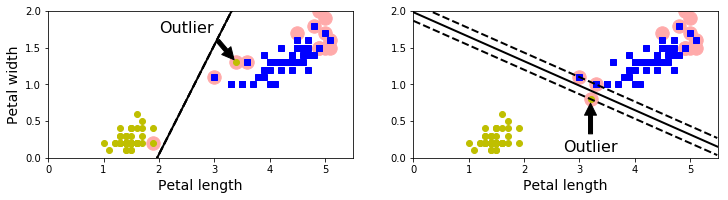

In [49]:
X_outliers = np.array([[3.4, 1.3], 
                       [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)



plt.figure(figsize=(12,2.7))

svm_clf21 = SVC(kernel="linear", C=1e10)
svm_clf21.fit(Xo1, yo1)
plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plot_svc_decision_boundary(svm_clf21, np.arange(0, 5.5, .01))
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

svm_clf22 = SVC(kernel="linear", C=1e10)
svm_clf22.fit(Xo2, yo2)
plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf22, np.arange(0, 5.5, .01))
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

### Soft Margin Classification

A soft margin based classification has more flexibility in that sense that it balances the maximization of the boundaries between the support vectors and the number of _margin violations_. A margin violation is an instance that appears on the incorrect side of the defined boundary.

To leverage this type of classification, we use a lower weighted hyper parameter of $c$. To add to this, $c$ is a regularization parameter in the sense of decreasing it will reduce overfitting to the data.

**Demonstration**

[0, 5.5, 0, 2]

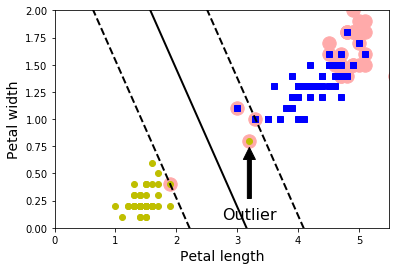

In [53]:
svm_clf23 = SVC(kernel="linear", C=1)
svm_clf23.fit(Xo2, yo2)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf23, np.arange(0, 5.5, .01))
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])